In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [2]:
df = pd.read_csv("core_dataset.csv")
print(df.shape)
df.head(2)

(302, 21)


,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.5,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.0,Brandon R. LeBlanc,Website Banner Ads,Fully Meets


## visualization 

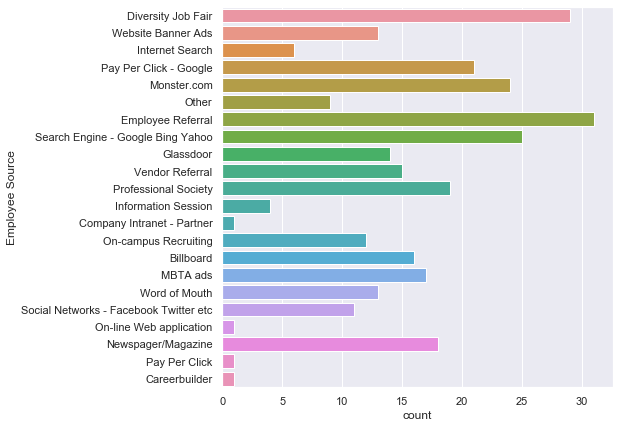

In [3]:
#to analyse the Employee Source
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(y="Employee Source", data=df)

Number of employes: 302


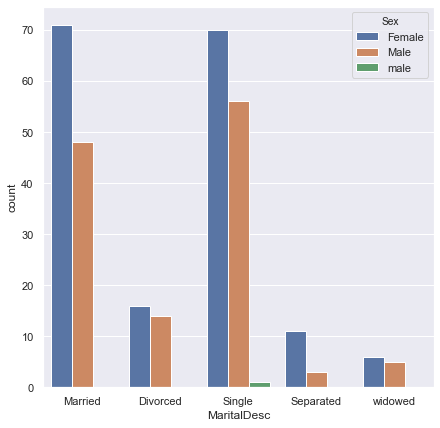

In [4]:
#to analyse the Employee 
print("Number of employes: "+str(len(df.index)))
sns.countplot(x="MaritalDesc", hue="Sex", data=df)

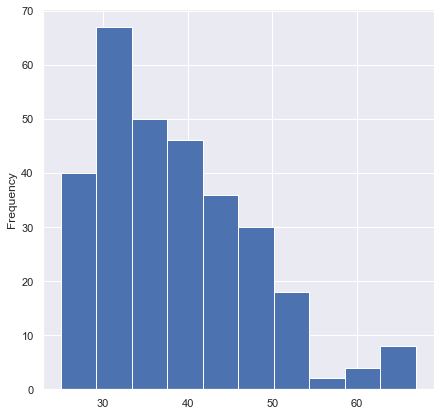

In [5]:
#to see the age distribution
df["Age"].plot.hist()

In [6]:
dat = pd.read_csv("HRDataset_v9.csv")
print(dat.shape)
dat.head(3)

(310, 28)


,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.5,...,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.0,...,1/6/2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.0,...,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets


In [7]:
dat.columns

Index(['Employee Name', 'Employee Number', 'MarriedID', 'MaritalStatusID',
       'GenderID', 'EmpStatus_ID', 'DeptID', 'Perf_ScoreID', 'Age', 'Pay Rate',
       'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc',
       'Hispanic/Latino', 'RaceDesc', 'Date of Hire', 'Days Employed',
       'Date of Termination', 'Reason For Term', 'Employment Status',
       'Department', 'Position', 'Manager Name', 'Employee Source',
       'Performance Score'],
      dtype='object')

In [8]:
numcols = ['Age', 'Pay Rate', 'Days Employed']
catcols = ['Sex']

In [9]:
data = dat[numcols+catcols]

In [24]:
data.head()

,Age,Pay Rate,Days Employed,Sex
0,30,28.50,3317,Female
1,34,23.00,1420,Male
2,31,29.00,1154,Male
3,32,21.50,58,Female
4,30,16.56,940,Female


## Summary 

In [10]:
data.describe()

,Age,Pay Rate,Days Employed
count,310.000000,310.000000,310.000000
mean,38.867742,31.284806,1296.080645
std,8.922459,15.383615,769.491382
min,25.000000,14.000000,2.000000
25%,32.000000,20.000000,766.250000
50%,37.000000,24.000000,1238.000000
75%,44.000000,45.315000,1732.750000
max,67.000000,80.000000,4339.000000


In [11]:
Y = data['Days Employed']>=1238
X = data.copy()
del X['Days Employed']
len(X.columns)

3

In [12]:
print(len(X))
print(len(Y))

310
310


## Split-out validation dataset 

In [13]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, random_state = seed)
kfold

KFold(n_splits=10, random_state=7, shuffle=False)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv_logistic_reg = cross_val_score(LogisticRegression(),
                                 X_train, Y_train, cv=kfold, scoring = 'accuracy')

C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [16]:
cv_logistic_reg

array([0.4       , 0.56      , 0.44      , 0.6       , 0.52      ,
       0.36      , 0.44      , 0.36      , 0.41666667, 0.66666667])

## Spot-Check Algorithms

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy' )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

LR: 0.476333 (0.099760)
LDA: 0.488500 (0.092624)
KNN: 0.549500 (0.152407)


## Make predictions on validation dataset

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5806451612903226
[[20 12]
 [14 16]]
              precision    recall  f1-score   support

       False       0.59      0.62      0.61        32
        True       0.57      0.53      0.55        30

    accuracy                           0.58        62
   macro avg       0.58      0.58      0.58        62
weighted avg       0.58      0.58      0.58        62



In [20]:
len(X_validation)

62

In [21]:
predictions

array([ True,  True,  True, False, False, False,  True,  True, False,
        True, False, False, False, False, False,  True,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True])

In [22]:
hasil = X_validation
hasil["label_predict"] = predictions
hasil["actual_label"] = Y_validation
hasil[hasil["label_predict"] != hasil["actual_label"]]

C:\Users\user only\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user only\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pay Rate,label_predict,actual_label
102,21.25,True,False
170,20.00,False,True
264,55.00,False,True
274,55.00,False,True
60,55.00,False,True
84,20.00,False,True
3,21.50,True,False
128,20.00,False,True
155,15.00,False,True
30,28.99,False,True


## Result 

In [23]:
hasil

,Pay Rate,label_predict,actual_label
279,57.00,True,True
102,21.25,True,False
171,22.00,True,True
170,20.00,False,True
307,46.00,False,False
264,55.00,False,True
132,21.00,True,True
159,22.00,True,True
37,39.00,False,False
81,16.00,True,True
